In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/lung_colon_image_set"

/content/drive/MyDrive/Colab Notebooks/lung_colon_image_set


In [3]:
import tensorflow as tf, keras
tf.__version__, keras.__version__

('2.12.0', '2.12.0')

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16 as backend
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_input_backend
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import load_img, img_to_array 
import os,numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd, os
import keras

**Dataset**

In [5]:
ls

lung_image_sets/


In [6]:
image_set = "/content/drive/MyDrive/lung_colon_image_set/lung_image_sets"

In [7]:
'''import os
import shutil

new_path ="dataset2/With Cancer/"
for image in os.listdir("dataset/With Cancer")[2:302]:
    path = 'dataset/With Cancer/' + image
    shutil.move(path, new_path)'''

'import os\nimport shutil\n\nnew_path ="dataset2/With Cancer/"\nfor image in os.listdir("dataset/With Cancer")[2:302]:\n    path = \'dataset/With Cancer/\' + image\n    shutil.move(path, new_path)'

In [8]:
SIZE_X = SIZE_Y = 224
#80% train data 20% test data
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.2)
train_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X,SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='training',
                                       seed = 42)

validate_set = datagen.flow_from_directory(image_set,
                                       class_mode = "categorical",
                                       target_size = (SIZE_X, SIZE_Y),
                                       color_mode="rgb",
                                       batch_size = 128, 
                                       shuffle = False,
                                       subset='validation',
                                       seed = 42)

Found 12013 images belonging to 3 classes.
Found 3003 images belonging to 3 classes.


In [9]:
IMAGE_SIZE = [224, 224]

**Model creation**

In [10]:
#resnet
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 4s 0us/step


In [11]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [12]:
#custom model
flatten = Flatten()(resnet.output)
layer1 = Dense(512, activation = 'relu')(flatten)
midlayer1 = Dense(512, activation = 'relu')(layer1)
midlayer2 = Dense(512, activation = 'relu')(midlayer1)
midlayer3 = Dense(512, activation = 'relu')(midlayer2)
midlayer4 = Dense(512, activation = 'relu')(midlayer3)
midlayer5 = Dense(512, activation = 'relu')(midlayer4)
midlayer6 = Dense(512, activation = 'relu')(midlayer5)
midlayer7 = Dense(512, activation = 'relu')(midlayer6)
midlayer8 = Dense(512, activation = 'relu')(midlayer7)
midlayer9 = Dense(512, activation = 'relu')(midlayer8)
midlayer10 = Dense(512, activation = 'relu')(midlayer9)
midlayer11 = Dense(512, activation = 'relu')(midlayer10)
midlayer12 = Dense(256, activation = 'relu')(midlayer11)
midlayer13 = Dense(256, activation = 'relu')(midlayer12)
midlayer14 = Dense(256, activation = 'relu')(midlayer13)
midlayer15 = Dense(256, activation = 'relu')(midlayer14)
midlayer16 = Dense(256, activation = 'relu')(midlayer15)
midlayer17 = Dense(256, activation = 'relu')(midlayer16)
midlayer18 = Dense(256, activation = 'relu')(midlayer17)
midlayer19 = Dense(256, activation = 'relu')(midlayer18)
midlayer20 = Dense(256, activation = 'relu')(midlayer19)
midlayer21 = Dense(256, activation = 'relu')(midlayer20)
midlayer22 = Dense(128, activation = 'relu')(midlayer21)
midlayer23 = Dense(256, activation = 'relu')(midlayer22)
midlayer24 = Dense(128, activation = 'relu')(midlayer23)
midlayer25 = Dense(128, activation = 'relu')(midlayer24)
midlayer26 = Dense(128, activation = 'relu')(midlayer25)
midlayer27 = Dense(128, activation = 'relu')(midlayer26)
midlayer28 = Dense(128, activation = 'relu')(midlayer27)
midlayer29 = Dense(128, activation = 'relu')(midlayer28)
midlayer30 = Dense(128, activation = 'relu')(midlayer29)
midlayer31 = Dense(128, activation = 'relu')(midlayer30)
midlayer32 = Dense(256, activation = 'relu')(midlayer31)
midlayer33 = Dense(64, activation = 'relu')(midlayer32)
midlayer34 = Dense(64, activation = 'relu')(midlayer33)
midlayer35 = Dense(64, activation = 'relu')(midlayer34)
midlayer36 = Dense(64, activation = 'relu')(midlayer35)
midlayer37 = Dense(64, activation = 'relu')(midlayer36)
midlayer38 = Dense(64, activation = 'relu')(midlayer37)
midlayer39 = Dense(64, activation = 'relu')(midlayer38)
midlayer40 = Dense(64, activation = 'relu')(midlayer39)
prediction = Dense(3, activation = 'softmax')(midlayer1)

In [13]:
model = Model(inputs = resnet.input, outputs = prediction )

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

**Model training**

In [15]:
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [16]:
H = model.fit_generator(train_set, epochs = 5)

<ipython-input-16-d1bd0d76675e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(train_set, epochs = 5)


Epoch 1/5
94/94 [==============================] - 5770s 62s/step - loss: 579.5394 - accuracy: 0.2903
Epoch 2/5
94/94 [==============================] - 134s 1s/step - loss: 1.3530 - accuracy: 0.3010
Epoch 3/5
94/94 [==============================] - 136s 1s/step - loss: 1.1064 - accuracy: 0.2813
Epoch 4/5
94/94 [==============================] - 134s 1s/step - loss: 1.1062 - accuracy: 0.2899
Epoch 5/5
94/94 [==============================] - 133s 1s/step - loss: 1.1043 - accuracy: 0.3330


In [17]:
#model.save("classification_model.h5")

**Accuracy and loss**

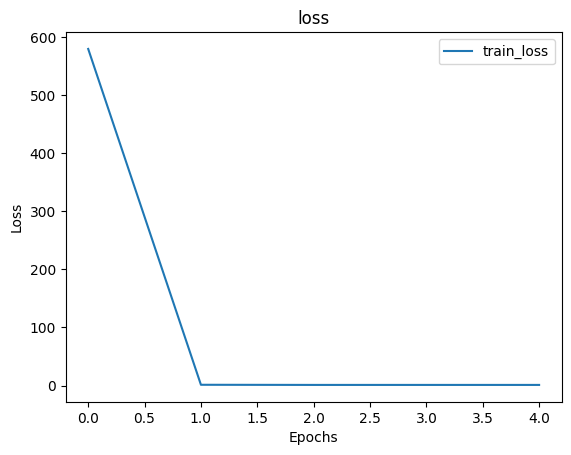

In [18]:
# plotting the loss
import matplotlib.pyplot as plt
plt.plot(H.history['loss'],label = 'train_loss')
plt.title('loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

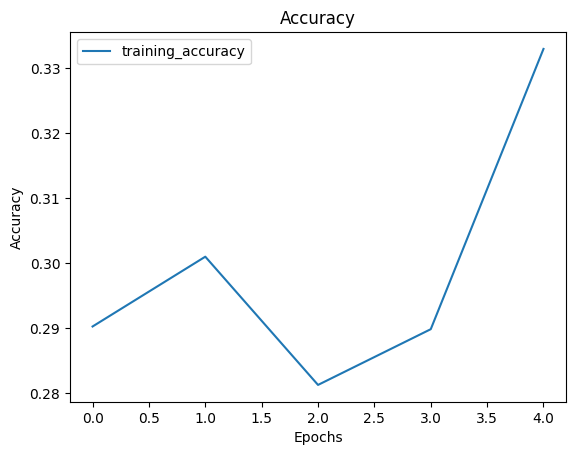

In [19]:
# Both Validation and Training accuracy is shown here
plt.plot(H.history['accuracy'], label='training_accuracy')
plt.title('Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
result = model.evaluate(validate_set,batch_size=128)
print("test_loss, test accuracy",result)

 9/24 [==========>...................] - ETA: 3:42 - loss: 1.1052 - accuracy: 0.0000e+00

**Model inference**

In [ ]:
Y_pred = model.predict_generator(validate_set)

In [ ]:
list(map(lambda x: np.argmax(x), Y_pred))

In [ ]:
import os, cv2
os.listdir("dataset/melanoma/")[:3], os.listdir("dataset/notmelanoma/")[:2]

In [ ]:
from PIL import Image
from torchvision import transforms
import torch

img1 = Image.open("dataset/notmelanoma/ISIC_0024316.jpg").convert('RGB')
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])
img1 = preprocess(img1)
img1 = torch.unsqueeze(img1, 0)

In [ ]:
img1 = Image.open("dataset/notmelanoma/ISIC_0024316.jpg").convert('RGB')
img1

In [ ]:
preprocess(img1)

In [ ]:
img1 = img1.reshape(1,224,224,3)
img1.shape

In [ ]:
Y_pred = model.predict_generator(np.array(img1))

In [ ]:
np.argmax(Y_pred)